In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import metrics #模型评估
import train_test_split as tts #数据划分
import Feature_Engineering #特征工程处理
from sklearn.linear_model import LogisticRegression #sklearn的分类器
from LClassifier import LClassifier #我自己的分类器
from sklearn.ensemble import RandomForestClassifier #sklearn的随机森林分布器

/home/sgw/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from sklearn import datasets

wines = datasets.load_wine()
X_train, y_train = wines.data, wines.target

In [3]:
for i in range(X_train.shape[1]):
        X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i])) / np.std(X_train[:,i])

In [3]:
X_train, y_train = Feature_Engineering.datatransform(file='./train.csv') #特征工程

In [4]:
X_train, y_train, X_test, y_test = tts.holdout(X_train, y_train)
#res = tts.crossvalidation(X_train, y_train, myclassifier=LogisticRegression,k=10, p=10, scoring=metrics.acc_score)
#自此，数据划分结束，开始训练模型



lclf = LClassifier()
lclf.fit(X_train, y_train)
y_pred = lclf.predict(X_test)
lclf.predict(X_test)

#随机森林：
#cfclf = RandomForestClassifier(n_estimators=300, n_jobs=-1, oob_score=True, random_state=666)
#cfclf.fit(X_train,y_train)
#cfclf.oob_score_
#自此模型训练完毕，开始获取评分

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
acc_score = lclf.score(X_test, y_test, metrics.acc_score)
recall = lclf.score(X_test, y_test, metrics.recall)
precisionrate = lclf.score(X_test, y_test, metrics.precisionrate) 
F1_score= lclf.score(X_test, y_test, metrics.F1_score)
print('acc_score =', acc_score, ',recall =', recall, ',precisionrate =', precisionrate, ',F1_score =', F1_score)

acc_score = 0.3333333333333333 ,recall = 0.0 ,precisionrate = nan ,F1_score = 0.0


/home/sgw/tasks/LogisticRegression/metrics.py:22: RuntimeWarning: invalid value encountered in long_scalars
  precisionrate = TP / (TP + FP)


In [5]:
test = LogisticRegression()
test.fit(X_train,y_train)
test.score(X_test, y_test)

0.9259259259259259

In [4]:
#绘制roc,p-r
TPR_history = []
FPR_history = []
P_history = []
R_history = []
for i in range(100):
    y_pred = lclf.predict(X_test, rate=(i * 0.01))
    TN, FN, TP, FP = metrics.confusion_metrix(y_pred, y_test)
    TPR = TP / (TP + FN)
    FPR = FP / (TN + FP)
    precisionrate = TP / (TP + FP)
    recall = TP / (TP + FN)
    TPR_history.append(TPR)
    FPR_history.append(FPR)
    P_history.append(precisionrate)
    R_history.append(recall)
#这里应该是precisionrate有关的那两行出了问题，？

/home/sgw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


<function matplotlib.pyplot.show(*args, **kw)>

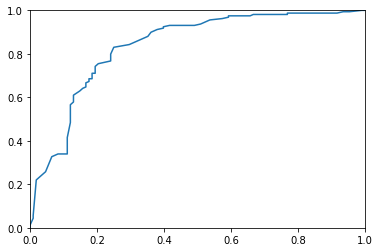

In [5]:
plt.plot(FPR_history, TPR_history)
plt.axis([0,1,0,1])
plt.show
#怎么这么不光滑= =

<function matplotlib.pyplot.show(*args, **kw)>

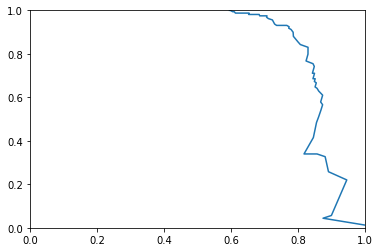

In [6]:
plt.plot(P_history,R_history)
plt.axis([0,1,0,1])
plt.show

In [7]:
AUC = 0.5*sum([((FPR_history[i] - FPR_history[i-1]) * (TPR_history[i] + TPR_history[i-1])) for i in range(1,len(TPR_history))])
print('AUC =', AUC)

AUC = 0.8368273934311672


In [93]:
indd = np.random.choice(10,size=(10,))
aa = np.arange(10)
bb = np.arange(2,12)
list(set(aa) & set(bb))

[2, 3, 4, 5, 6, 7, 8, 9]